In [1]:
import numpy as np # scientific computing
import pandas as pd # data loading and processing
import os # os operations
import matplotlib.pyplot as plt # for generating figures
import math
import matplotlib.dates as mdates
import seaborn as sns # for generating visualizations, better support with pandas than matplotlib

# Colorectal data analysis

In [129]:
df = pd.read_csv("data_mrna_seq_v2_rsem.csv", index_col=0).drop(["Entrez_Gene_Id"], axis=1)
df.head()

,TCGA-3L-AA1B-01,TCGA-4N-A93T-01,TCGA-4T-AA8H-01,TCGA-5M-AAT4-01,TCGA-5M-AAT5-01,TCGA-5M-AAT6-01,TCGA-5M-AATA-01,TCGA-5M-AATE-01,TCGA-A6-2675-01,TCGA-A6-2682-01,...,TCGA-AG-A01N-01,TCGA-AG-A01W-01,TCGA-AG-A01Y-01,TCGA-AG-A020-01,TCGA-AG-A025-01,TCGA-AG-A026-01,TCGA-AG-A02G-01,TCGA-AG-A02N-01,TCGA-AG-A02X-01,TCGA-AG-A032-01
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
NaN,0.5174,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,18.0851,4.4315,9.8995,7.9174,12.2565,3.9637,7.2366,11.629,7.6170,5.4150,...,15.743594,14.537972,21.727246,10.163220,12.410499,16.960418,15.046868,19.482340,10.879230,7.132114
UBE2Q2P2,15.7640,4.2767,11.3032,18.7608,20.8826,15.0672,11.4513,6.906,6.4086,4.3649,...,15.217727,16.618064,32.527797,12.122878,19.251253,22.282965,19.436783,2.815511,5.598328,13.724609
HMGB1P1,144.4000,142.6610,143.1990,146.1880,262.5110,228.2520,124.2350,240.714,178.4220,245.7440,...,294.057306,447.567616,378.234898,354.662405,410.955520,289.758443,368.360542,333.491605,373.021521,409.240194
NaN,774.6620,1185.2900,888.3200,1280.5500,1299.8400,945.6360,999.2050,606.849,860.4180,1126.7500,...,785.354182,1709.628217,795.456492,931.667192,951.035450,946.999379,840.062409,892.839596,681.086971,804.159653


In [130]:
data = df.loc[["G6PD","RRM2B", "NFE2L2"]]
data = data.T
data = data/math.log2(10)
# data.describe()
print(data.head())

Hugo_Symbol            G6PD       RRM2B       NFE2L2
TCGA-3L-AA1B-01  288.365664  158.812288   697.248686
TCGA-4N-A93T-01  268.698772  105.149175   747.508654
TCGA-4T-AA8H-01  283.037433  197.202041   581.644137
TCGA-5M-AAT4-01  508.150674  173.700930   681.035211
TCGA-5M-AAT5-01  296.297804  111.521077  1159.847501


In [131]:
# for each sequenced gene were rescaled to set the median equal to 1
data=(data-data.median()+1)/data.std()
data.describe()

Hugo_Symbol,G6PD,RRM2B,NFE2L2
count,592.000000,592.000000,592.000000
mean,0.257435,0.222075,0.072333
std,1.000000,1.000000,1.000000
min,-1.662985,-1.572742,-3.464761
25%,-0.403915,-0.394049,-0.575292
50%,0.006129,0.007809,0.004990
75%,0.628062,0.575192,0.660776
max,6.891343,7.879260,4.116966


In [132]:
# data = data.T
data.head()

Hugo_Symbol,G6PD,RRM2B,NFE2L2
TCGA-3L-AA1B-01,-0.054298,-0.335382,-0.134776
TCGA-4N-A93T-01,-0.174843,-0.754435,0.116021
TCGA-4T-AA8H-01,-0.086956,-0.035598,-0.711643
TCGA-5M-AAT4-01,1.292847,-0.219118,-0.215682
TCGA-5M-AAT5-01,-0.005679,-0.704677,2.173590


In [ ]:
# # HIF-activity was quantified by averaging the normal- ized expression of 44 target genes
# rrm2b = data.loc[["RRM2B"]]
# g6pd = data.loc[["G6PD"]]
# print(g6pd, rrm2b)

In [133]:
x, y = data.loc[:,"G6PD"].to_numpy(), data.loc[:,"RRM2B"].to_numpy()

#find line of best fit
a, b = np.polyfit(x, y, 1)

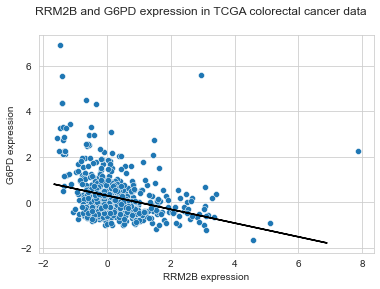

In [134]:

fig, axs = plt.subplots(1, 1, sharey=True)
sns.set_style("whitegrid")
sns.scatterplot(data=data, x="RRM2B", y="G6PD")
axs.set_ylabel("G6PD expression")
axs.set_xlabel("RRM2B expression")
fig.suptitle('RRM2B and G6PD expression in TCGA colorectal cancer data')
plt.plot(x, a*x+b, color="black")
plt.show()



In [135]:
X, y = data.loc[:,"G6PD"].to_numpy(), data.loc[:,"RRM2B"].to_numpy()
np.corrcoef(X, y)

array([[ 1.        , -0.30116533],
       [-0.30116533,  1.        ]])

Less RRM2B means more G6PD

# Pancancer data analysis

In [2]:
# load pancancer data
df = pd.read_csv("EB++AdjustPANCAN_IlluminaHiSeq_RNASeqV2.geneExp.xena", index_col=0, sep = "\t")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20531 entries, 100130426 to ZZZ3
Columns: 11069 entries, TCGA-OR-A5J1-01 to TCGA-CG-4477-01
dtypes: float64(11069)
memory usage: 1.7+ GB


In [3]:
# subset to get relevant genes
df_filtered = df.loc[["G6PD","RRM2B"]]
df_filtered.isnull().values.any()

False

In [4]:
# get phenotypes of samples
pheno = pd.read_csv("TCGA_phenotype_denseDataOnlyDownload.tsv", index_col=0, sep = "\t")
print(pheno.isnull().values.sum())
pheno_filtered = pheno.dropna()
print(pheno_filtered.dtypes)


sample_type_id      float64
sample_type          object
_primary_disease     object
dtype: object
-------
144
sample_type_id      float64
sample_type          object
_primary_disease     object
dtype: object
-------
0


In [11]:
# scale numerical data
df_filtered = df_filtered/math.log2(10)

# add the labels on which is normal vs cancer
df2 = pd.concat([df_filtered, pheno_filtered.T], join="inner")

df2.dtypes

TCGA-OR-A5J1-01    object
TCGA-OR-A5J2-01    object
TCGA-OR-A5J3-01    object
TCGA-OR-A5J5-01    object
TCGA-OR-A5J6-01    object
                    ...  
TCGA-CG-4472-01    object
TCGA-CG-4474-01    object
TCGA-CG-4475-01    object
TCGA-CG-4476-01    object
TCGA-CG-4477-01    object
Length: 11060, dtype: object

In [12]:
# transpose to patient x gene
df2 = df2.T  

# drop normal samples
df2.drop(df2.loc[df2["sample_type"] == "Solid Tissue Normal"].index, inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11060 entries, TCGA-OR-A5J1-01 to TCGA-CG-4477-01
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   G6PD              11060 non-null  object
 1   RRM2B             11060 non-null  object
 2   sample_type_id    11060 non-null  object
 3   sample_type       11060 non-null  object
 4   _primary_disease  11060 non-null  object
dtypes: object(5)
memory usage: 776.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 10323 entries, TCGA-OR-A5J1-01 to TCGA-CG-4477-01
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   G6PD              10323 non-null  object
 1   RRM2B             10323 non-null  object
 2   sample_type_id    10323 non-null  object
 3   sample_type       10323 non-null  object
 4   _primary_disease  10323 non-null  object
dtypes: object(5)
memory usage: 483.9+ KB
None


In [13]:
# cast object type to float type
df2 = df2.astype({'G6PD': 'float64', 'RRM2B': 'float64'})
df2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10323 entries, TCGA-OR-A5J1-01 to TCGA-CG-4477-01
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   G6PD              10323 non-null  float64
 1   RRM2B             10323 non-null  float64
 2   sample_type_id    10323 non-null  object 
 3   sample_type       10323 non-null  object 
 4   _primary_disease  10323 non-null  object 
dtypes: float64(2), object(3)
memory usage: 483.9+ KB


In [100]:
# get the data for the two genes
data = df2[['G6PD', 'RRM2B']]

# for each sequenced gene were rescaled to set the median equal to 1
data=(data-data.median()+1)/data.std()

data.head() # patient x gene

<class 'pandas.core.frame.DataFrame'>
Index: 10323 entries, TCGA-OR-A5J1-01 to TCGA-CG-4477-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G6PD    10323 non-null  float64
 1   RRM2B   10323 non-null  float64
dtypes: float64(2)
memory usage: 500.0+ KB


,G6PD,RRM2B
TCGA-OR-A5J1-01,10.555609,14.953496
TCGA-OR-A5J2-01,10.780492,12.566647
TCGA-OR-A5J3-01,11.764352,13.441037
TCGA-OR-A5J5-01,11.361438,11.006924
TCGA-OR-A5J6-01,10.143325,13.181084
...,...,...
TCGA-CG-4472-01,9.112614,13.559198
TCGA-CG-4474-01,9.524898,12.283061
TCGA-CG-4475-01,12.588921,13.949129
TCGA-CG-4476-01,9.403087,12.909314


In [102]:
x, y = data["G6PD"].to_numpy(), data["RRM2B"].to_numpy()

#find line of best fit
a, b = np.polyfit(x, y, 1)

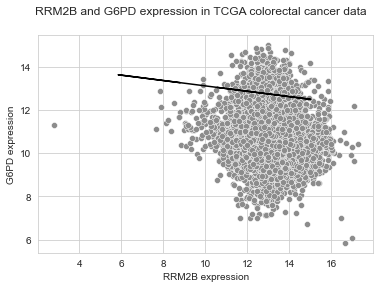

In [103]:

fig, axs = plt.subplots(1, 1, sharey=True)
sns.set_style("whitegrid")
sns.scatterplot(data=data, x="RRM2B", y="G6PD", color=".55", ax=axs)
axs.set_ylabel("G6PD expression")
axs.set_xlabel("RRM2B expression")
fig.suptitle('RRM2B and G6PD expression in TCGA colorectal cancer data')

plt.plot(x, a*x+b, color="black")
plt.show()


In [104]:
X, y = data.loc[:,"G6PD"].to_numpy(), data.loc[:,"RRM2B"].to_numpy()
np.corrcoef(X, y)

array([[ 1.       , -0.1243346],
       [-0.1243346,  1.       ]])

In [105]:
patients = data.index.to_list()

## Add NRF2 dimension

In [106]:
# get names of nrf2 target genes
nrf2_names = pd.read_csv("nrf2 target genes.csv", index_col=None, header= None).T
nrf2_names = nrf2_names.loc[0].to_list()

In [107]:
# get nrf2 target genes
nrf2 = df.loc[nrf2_names]

# get only patients with cancer samples
nrf2 = nrf2[patients]

nrf2.head()


,TCGA-OR-A5J1-01,TCGA-OR-A5J2-01,TCGA-OR-A5J3-01,TCGA-OR-A5J5-01,TCGA-OR-A5J6-01,TCGA-OR-A5J7-01,TCGA-OR-A5J8-01,TCGA-OR-A5J9-01,TCGA-OR-A5JA-01,TCGA-OR-A5JB-01,...,TCGA-CG-4449-01,TCGA-CG-4462-01,TCGA-CG-4465-01,TCGA-CG-4466-01,TCGA-CG-4469-01,TCGA-CG-4472-01,TCGA-CG-4474-01,TCGA-CG-4475-01,TCGA-CG-4476-01,TCGA-CG-4477-01
sample,,,,,,,,,,,,,,,,,,,,,
ABCC5,10.25,10.57,10.36,10.81,9.53,11.39,9.79,9.91,10.04,10.08,...,9.56,9.86,8.89,8.16,10.12,10.48,10.38,9.03,10.68,9.71
ADD3,8.70,9.32,7.23,9.14,9.51,10.14,11.13,9.37,8.02,10.83,...,11.87,11.20,12.39,11.43,12.34,12.14,12.59,11.91,12.62,12.61
APIP,7.50,8.86,9.20,7.35,10.10,10.01,8.35,8.66,8.74,9.19,...,10.40,8.88,9.02,9.72,9.08,9.32,9.01,9.35,9.14,8.51
ASF1A,10.22,8.51,9.02,9.47,9.68,9.48,8.58,9.34,9.97,8.63,...,8.72,8.46,8.61,9.63,9.17,8.90,8.55,8.45,8.58,8.82
AXIN2,9.10,10.81,9.03,8.40,3.39,7.96,7.21,9.02,7.25,4.48,...,9.63,8.11,8.41,10.26,7.48,9.63,8.55,9.31,10.34,12.14


In [109]:
# scale numerical data to log10
nrf2 = nrf2/math.log2(10)

# for each sequenced gene were rescaled to set the median equal to 1
nrf2=(nrf2-nrf2.median()+1)/nrf2.std()
nrf2.describe()

# for each patient, average across all normalised expression values
nrf2 = nrf2.T
nrf2["NFE2L2"] = nrf2.mean(axis=1)
nrf2 = nrf2.T
nrf2.head() # genes x patients


,TCGA-OR-A5J1-01,TCGA-OR-A5J2-01,TCGA-OR-A5J3-01,TCGA-OR-A5J5-01,TCGA-OR-A5J6-01,TCGA-OR-A5J7-01,TCGA-OR-A5J8-01,TCGA-OR-A5J9-01,TCGA-OR-A5JA-01,TCGA-OR-A5JB-01,...,TCGA-CG-4449-01,TCGA-CG-4462-01,TCGA-CG-4465-01,TCGA-CG-4466-01,TCGA-CG-4469-01,TCGA-CG-4472-01,TCGA-CG-4474-01,TCGA-CG-4475-01,TCGA-CG-4476-01,TCGA-CG-4477-01
sample,,,,,,,,,,,,,,,,,,,,,
ABCC5,1.524739,1.689009,1.716779,2.614115,1.038127,1.831007,1.253215,1.476372,1.636834,1.297608,...,1.604735,1.903745,1.058797,0.833561,1.518192,1.826408,1.948518,1.067995,2.376094,1.650639
ADD3,0.917496,1.179894,0.405182,1.716205,1.031519,1.366466,1.732069,1.250328,0.803341,1.551250,...,2.744655,2.617931,2.570176,2.346243,2.477889,2.601432,3.087149,2.348560,3.478366,3.091625
APIP,0.447373,0.992540,1.230692,0.753775,1.226461,1.318154,0.738625,0.953122,1.100428,0.996620,...,2.019251,1.381431,1.114934,1.555207,1.068605,1.284825,1.242669,1.210280,1.501094,1.054369
ASF1A,1.512986,0.849988,1.155265,1.893636,1.087689,1.121189,0.820817,1.237770,1.607950,0.807234,...,1.190218,1.157582,0.937887,1.513574,1.107511,1.088735,1.005669,0.810103,1.182913,1.208405
AXIN2,1.074204,1.786759,1.159455,1.318329,-0.990596,0.556307,0.331242,1.103818,0.485624,-0.596252,...,1.639278,0.971041,0.851523,1.805008,0.376931,1.429559,1.005669,1.192494,2.182912,2.858085


In [111]:
print(nrf2.loc["NFE2L2"].T.describe()) # to get the interquartile range

# bin the patients into quartiles based on NRF2 activity
nrf2 = nrf2.T # patients x genes
nrf2["NRF2 activity"] = pd.cut(nrf2["NFE2L2"],
                bins=[ 0.408170, 1.225746, 1.616076, 2.409622],
                labels=["Bottom 25%", "-", "Top 25%"])
nrf2 = nrf2.T # genes x patients

# trabspose data to drop nan values
data = data.T # genes x patients
data = pd.concat([data, nrf2]).dropna(axis=1)


data.head()

In [119]:
data = data.T # patients x genes

# split data into quartiles into different dataframe based on NRF2 activity
low = data.loc[data["NRF2 activity"] == "Bottom 25%"].drop(['NRF2 activity'], axis=1).astype(float)
med = data.loc[data["NRF2 activity"] == "-"].drop(['NRF2 activity'], axis=1).astype(float)
high = data.loc[data["NRF2 activity"] == "Top 25%"].drop(['NRF2 activity'], axis=1).astype(float)
data = data.drop(['NRF2 activity'], axis=1).astype(float)



                      G6PD      RRM2B     ABCC5      ADD3      APIP     ASF1A  \
TCGA-OR-A5J1-01  10.555609  14.953496  1.524739  0.917496  0.447373  1.512986   
TCGA-OR-A5J2-01  10.780492  12.566647  1.689009  1.179894   0.99254  0.849988   
TCGA-OR-A5J3-01  11.764352  13.441037  1.716779  0.405182  1.230692  1.155265   
TCGA-OR-A5J5-01  11.361438  11.006924  2.614115  1.716205  0.753775  1.893636   
TCGA-OR-A5J6-01  10.143325  13.181084  1.038127  1.031519  1.226461  1.087689   

                    AXIN2      BMP4      CAP2       CAT  ...     PRRT1  \
TCGA-OR-A5J1-01  1.074204  1.160393  0.870484  1.873414  ...  0.083027   
TCGA-OR-A5J2-01  1.786759  1.839707   1.35503  1.819342  ... -0.909511   
TCGA-OR-A5J3-01  1.159455  1.989155  1.063076  1.943061  ... -0.554421   
TCGA-OR-A5J5-01  1.318329  1.796856  0.995727  2.167848  ...    1.4635   
TCGA-OR-A5J6-01 -0.990596 -0.941034  0.922483  1.708861  ... -0.121615   

                    PTGR1    SH3RF2      SRP9      SUB1   TBC1D14   

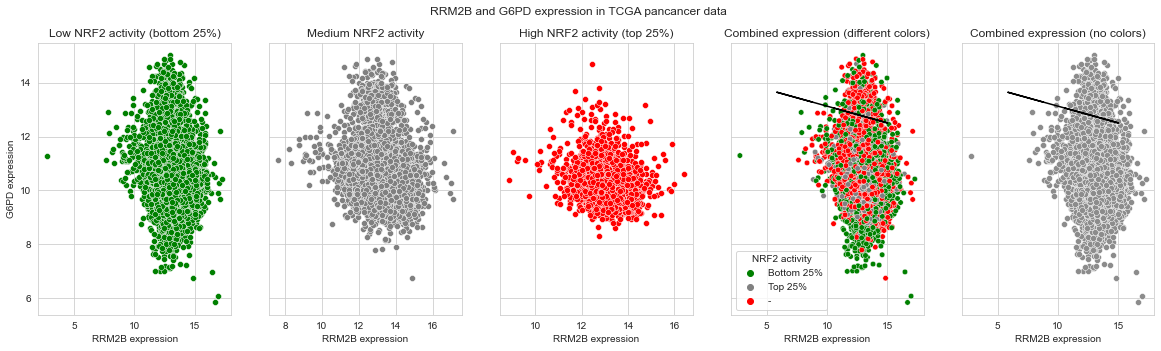

In [126]:
fig, axs = plt.subplots(1, 5, figsize=(20, 5), sharey=True)

sns.scatterplot(data=data, x="RRM2B", y="G6PD", color="green", ax=axs[0])
axs[0].set_title("Low NRF2 activity (bottom 25%)")
axs[0].set_ylabel("G6PD expression")
axs[0].set_xlabel("RRM2B expression")
# axs[0].set_xlim(-6.5, 8.5)
# axs[0].set_ylim(-1.5, 8)

sns.scatterplot(data=med, x="RRM2B", y="G6PD", color="gray", ax=axs[1])
axs[1].set_title("Medium NRF2 activity")
axs[1].set_ylabel("G6PD expression")
axs[1].set_xlabel("RRM2B expression")
# axs[1].set_xlim(-6.5, 8.5)
# axs[1].set_ylim(-1.5, 8)

sns.scatterplot(data=high, x="RRM2B", y="G6PD", color="red", ax=axs[2])
axs[2].set_title("High NRF2 activity (top 25%)")
axs[2].set_ylabel("G6PD expression")
axs[2].set_xlabel("RRM2B expression")
# axs[2].set_xlim(-6.5, 8.5)
# axs[2].set_ylim(-1.5, 8)

sns.scatterplot(data=data, x="RRM2B", y="G6PD", hue = nrf2.loc["NRF2 activity"], palette=['green','gray','red'],s=30, ax=axs[3])
axs[3].plot(x, a*x+b, color="black")
axs[3].set_title("Combined expression (different colors)")
axs[3].set_ylabel("G6PD expression")
axs[3].set_xlabel("RRM2B expression")
# axs[3].set_xlim(-6.5, 8.5)
# axs[3].set_ylim(-1.5, 8)

sns.scatterplot(data=data, x="RRM2B", y="G6PD", color=".55", ax=axs[4])
axs[4].plot(x, a*x+b, color="black")
axs[4].set_title("Combined expression (no colors)")
axs[4].set_ylabel("G6PD expression")
axs[4].set_xlabel("RRM2B expression")
# axs[4].set_xlim(-6.5, 8.5)
# axs[4].set_ylim(-1.5, 8)

fig.suptitle('RRM2B and G6PD expression in TCGA pancancer data')

plt.show()


In [127]:
X, y = data.loc[:,"G6PD"].to_numpy(), data.loc[:,"RRM2B"].to_numpy()
np.corrcoef(X, y)

array([[ 1.        , -0.12274883],
       [-0.12274883,  1.        ]])

-0.12274883 vs -0.1243346

Screening differentially regulated genes through a Signature Gene Screen (Including Heatmap Plot)
1. Normalise all values with (val-mean)/std
2. take an unweighted average across all genes for each patient